## Capstone 2: NBA Salary Predictor and Team Optimization
## Part 2: Exploratory Data Analysis
### Austin Cody

In [1]:
# importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso # for feature selection with L1 Regression
from sklearn.preprocessing import StandardScaler #to scale features before ^

import warnings
# Suppressing FutureWarning related to deprecated append method
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading our newly cleaned csv into pandas DataFrame
df = pd.read_csv('nba_salaries_cleaned.csv')

In [3]:
df.head()

,name,salary,position,age,team,games_played,games_started,minutes_pg,field_goals_pg,field_goal_attempts_pg,...,free_throw_%,o_rebounds_pg,d_rebounds_pg,total_rebounds_pg,assists_pg,steals_pg,blocks_pg,turnovers_pg,personal_fouls_pg,points_pg
0,Stephen Curry,48070014,['PG'],34,['GSW'],56,56,34.7,10.0,20.2,...,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4
1,John Wall,47345760,['PG'],32,['LAC'],34,3,22.2,4.1,9.9,...,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4
2,Russell Westbrook,47080179,['PG'],34,"['LAL', 'LAC']",73,24,29.1,5.9,13.6,...,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9
3,LeBron James,44474988,['PF'],38,['LAL'],55,54,35.5,11.1,22.2,...,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9
4,Kevin Durant,44119845,['PF'],34,"['BRK', 'PHO']",47,47,35.6,10.3,18.3,...,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1


# Categorical Variables
### Position

In [4]:
# categorical variables position and team are stored as strings (they were stored as lists previously)
# this is an issue as i need to iterate through the items in the list, but the csv import/export process took the list as a string

In [5]:
# converting string to list - using eval does this most succinctly
df['position'] = df['position'].apply(eval)

In [6]:
# Creating a new dataframe to visualize position against salary - this is necessary because the positions column is a list of positions
positions = []
salaries = []

for i in range(len(df['position'])):
    list_of_position = df['position'][i]
    for j in range(len(list_of_position)):
        positions.append(list_of_position[j])
        salaries.append(df['salary'][i])

positions_dict = {'position':positions, 
                  'salary':salaries}

df_position = pd.DataFrame(positions_dict)

#I counted 7 players with more than 1 position. the length of this dataframe should be seven more than the length of df
assert len(df_position) == len(df) + 7

<Figure size 1200x800 with 0 Axes>

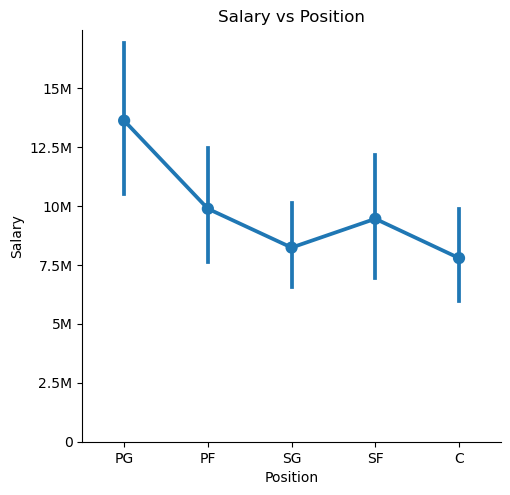

In [7]:
plt.figure(figsize=(12, 8))
sns.catplot(x='position',
            y='salary',
            data=df_position,
            kind='point',
            estimator='mean',
           )
plt.title('Salary vs Position')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.yticks([0, 2.5e6, 5e6, 7.5e6, 1e7, 1.25e7, 1.5e7],
           ['0', '2.5M','5M', '7.5M', '10M', '12.5M', '15M'])
plt.show()
# it seems point guards are paid more

### Team

In [8]:
#turning team back into a list
df['team'] = df['team'].apply(eval)

In [9]:
teams = []
salaries = [] # can't use the same salaries list as before because the lengths of these two lists need to match

for i in range(len(df['team'])):
    list_of_teams = df['team'][i]
    for j in range(len(list_of_teams)):
        teams.append(list_of_teams[j])
        salaries.append(df['salary'][i])

teams_dict = {'team':teams, 
              'salary':salaries}

df_team = pd.DataFrame(teams_dict)
#now we have a dataframe of single teams with their associated salaries.

<Figure size 10000x10000 with 0 Axes>

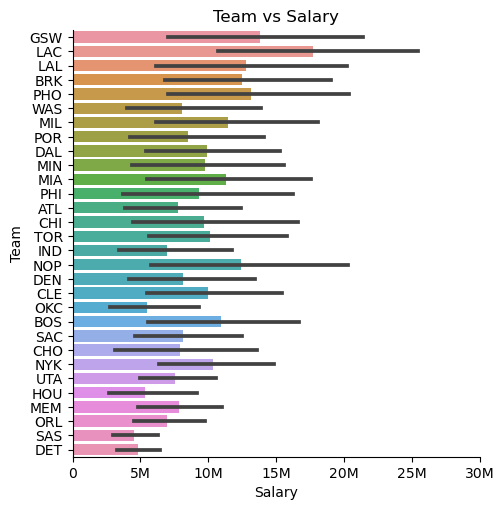

In [10]:
# because our team column has 30 different categories, we will use a horizontal bar chart
plt.figure(figsize=(100,100))
sns.catplot(x='salary',
            y='team',
            data=df_team,
            kind='bar',
            estimator='mean'
           )
plt.title('Team vs Salary')
plt.ylabel('Team')
plt.xlabel('Salary')
plt.xticks([0, 5e6, 1e7,1.5e7,2e7,2.5e7,3e7],
           ['0', '5M', '10M', '15M', '20M', '25M', '30M'])
plt.show()
#it appears that the Los Angeles Clippers have a higher average salary than the other teams

# Numerical Variables

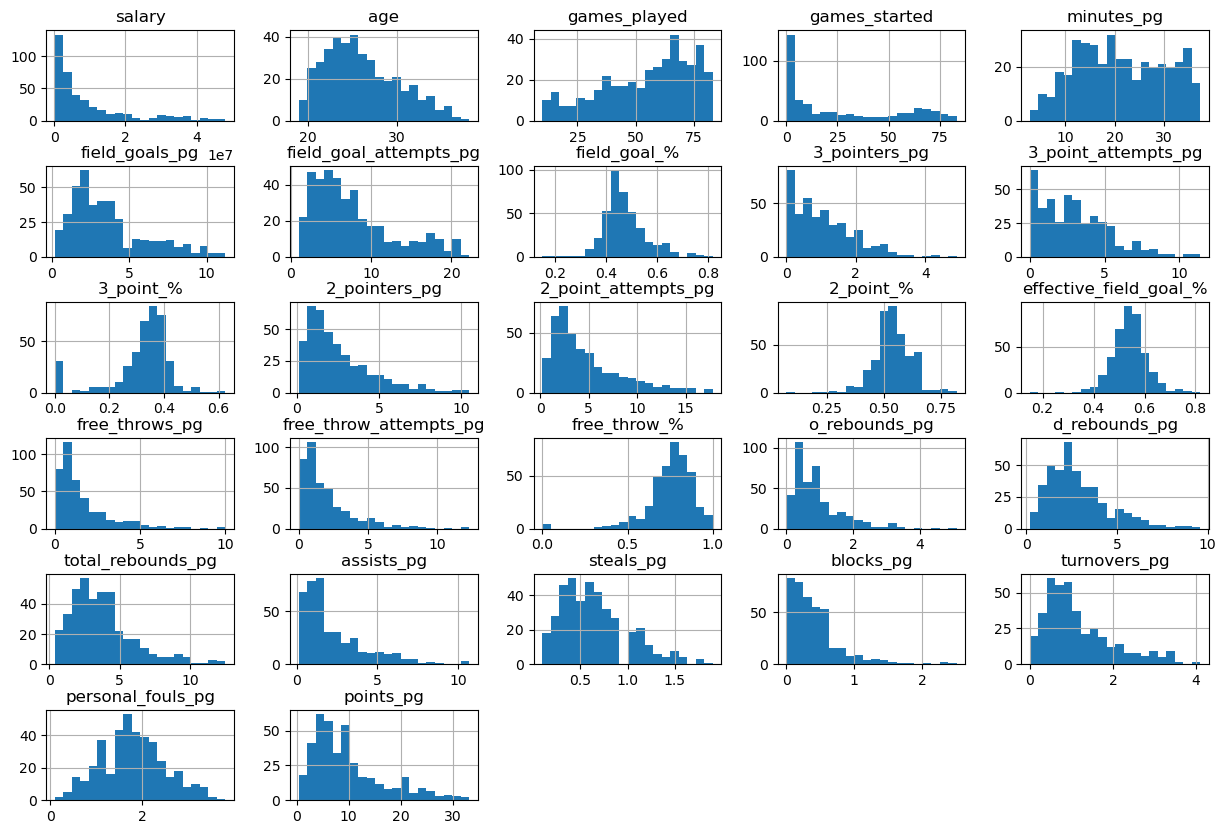

In [11]:
df.hist(bins=20,figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

# Relationships between Variables

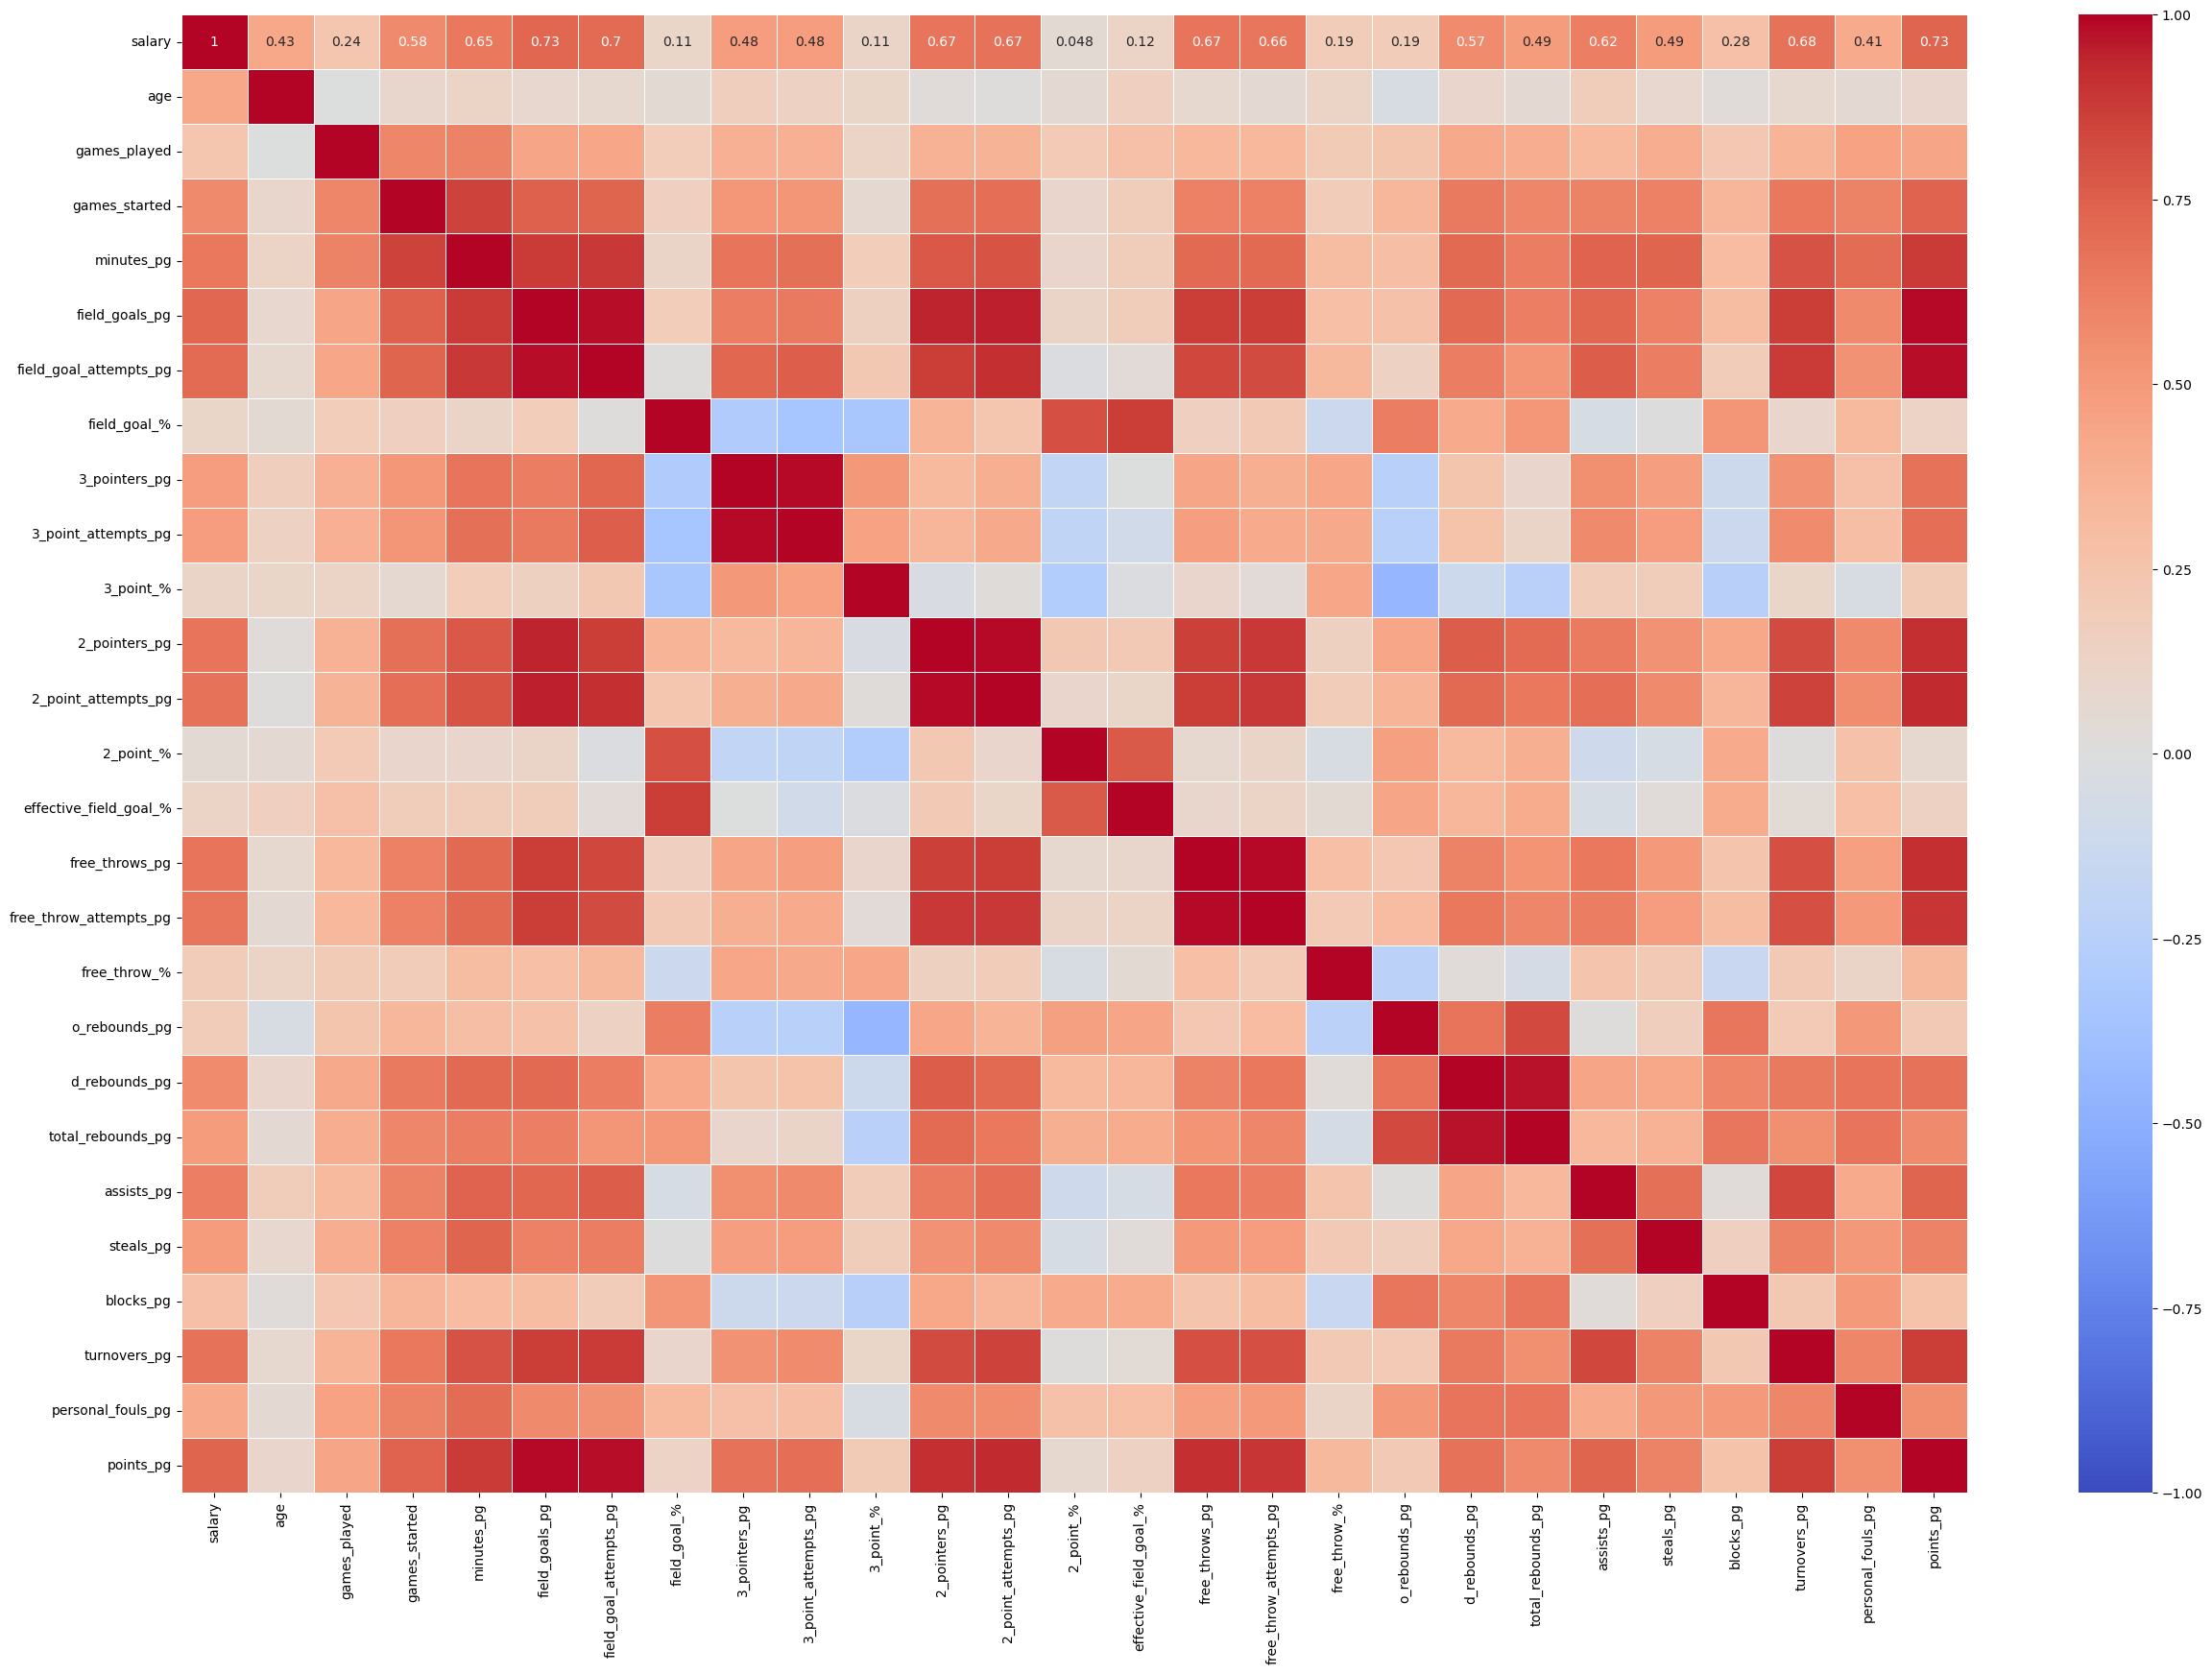

In [12]:
# Creating heatmap to examine correlation coefficients between salary and other variables
correlation_matrix = df.corr(numeric_only=True)
plt.subplots(figsize=(30,20))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            linewidths=.5,
            vmin=-1, # to make sure colors do not scale to our lowest and highest correlation coefficients
            vmax=1.0);

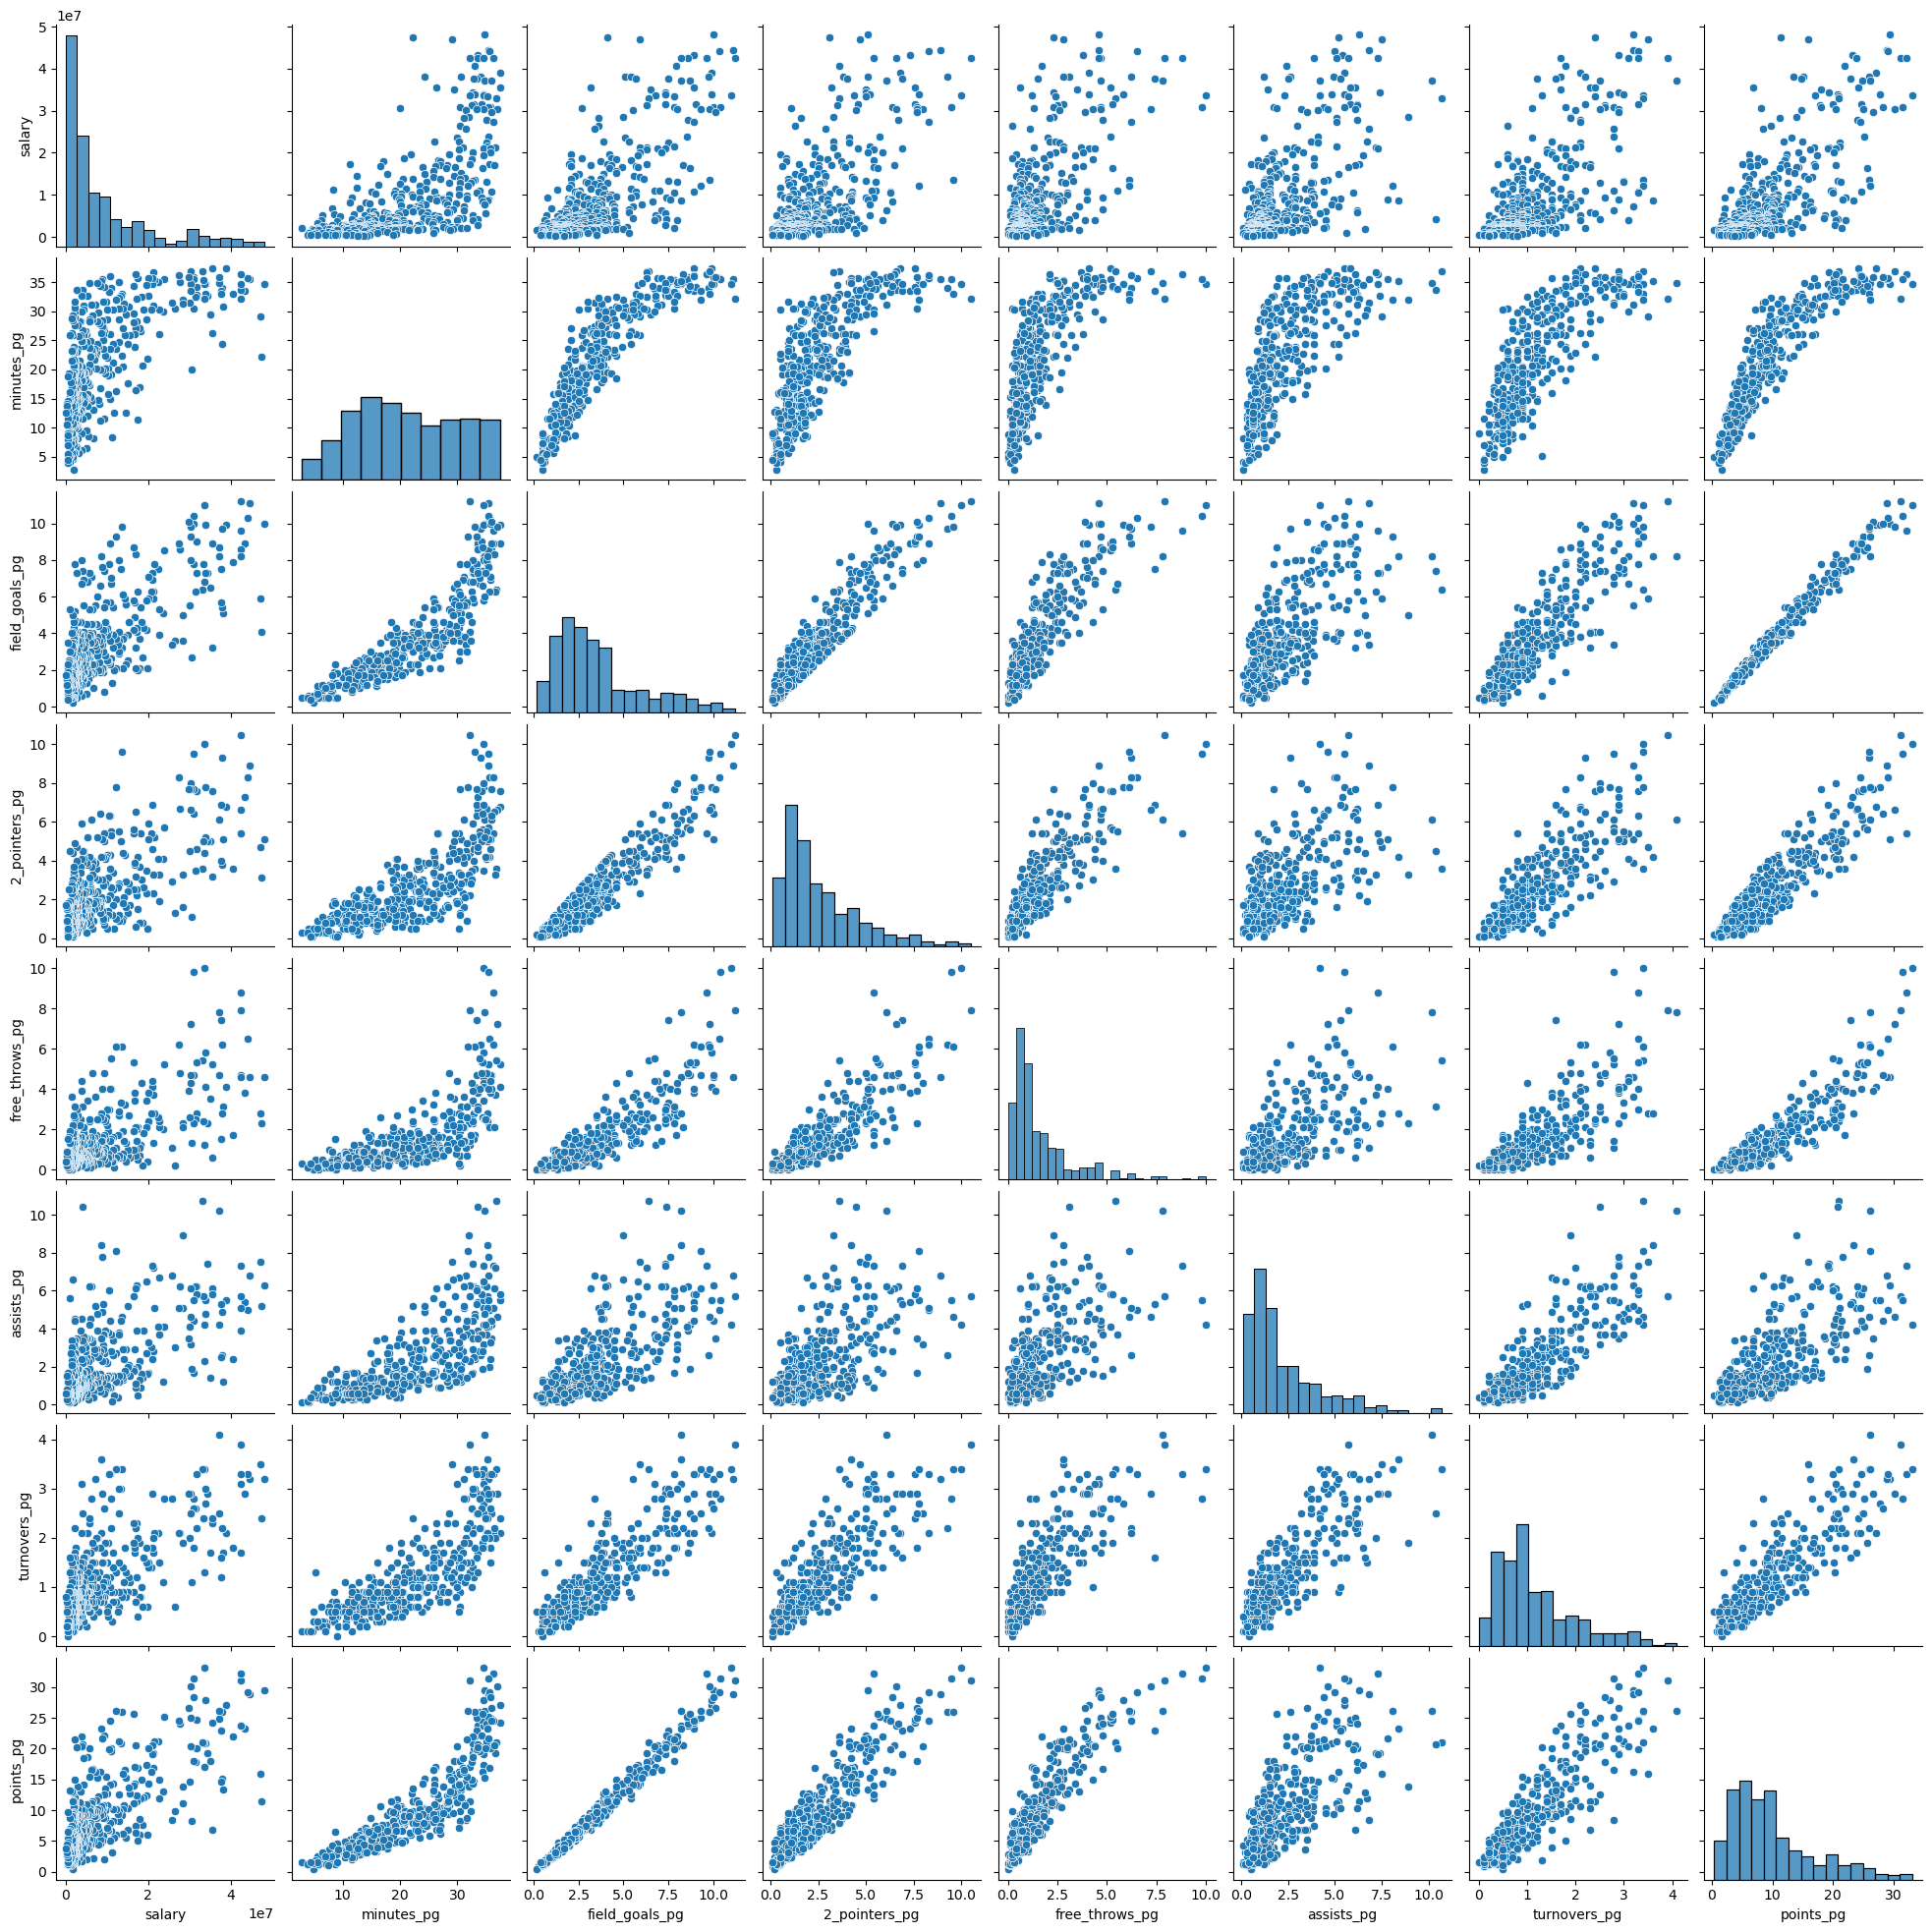

In [13]:
# Taking a look at all columns with a correlation coefficient above 0.60 from our heatmap
# removing columns that use attempts?
df_num = df[['salary','minutes_pg','field_goals_pg','2_pointers_pg','free_throws_pg','assists_pg','turnovers_pg','points_pg']]
sns.pairplot(df_num, corner=False)
plt.show()

### Notes:
#### 1. Turnovers per game being well correlated with salary is counterintuitive. Why would a highly valued player cause more turnovers? Considering that a player who handles the ball more, passes more, and shoots more, is more likely to err, the high correlation between turnovers_pg and salary makes much more sense.
#### 2. The shooting statistics columns and their respective attempts_pg columns don't seem to offer much new information. They follow similar trends and in all cases have very similar correlation coefficients. I'll try dropping the attempts columns to make our features a bit more concise.
#### 3. A lower correlation coefficient threshold might be useful here. The currently selected features are all offensive metrics. Rebounds and steals are both moderately correlated with salary and might make for more accurate predictions

In [14]:
# Using Lasso (L1) Regression for feature selection

scaler = StandardScaler()

potential_numeric_features = df.drop(['salary','name','team','position'],axis=1)

feature_names = potential_numeric_features.columns
X_scaled = scaler.fit_transform(potential_numeric_features)
y = df['salary'].values

lasso = Lasso(alpha=10.0,max_iter=100000)
lasso_coef = lasso.fit(X_scaled,y).coef_

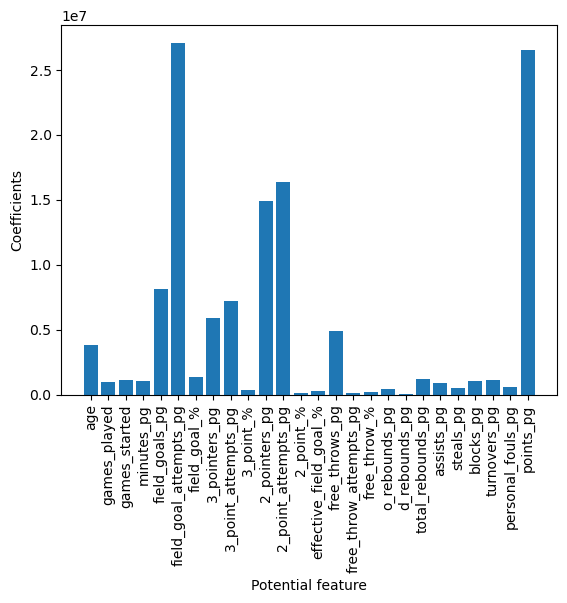

In [15]:
plt.bar(feature_names,abs(lasso_coef))
plt.xlabel("Potential feature")
plt.ylabel("Coefficients")
plt.xticks(rotation=90)
plt.show()

## Lasso Regression Feature Selection Results:
Our Lasso Regression suggests that  the important features are age, field_goals_pg, field_goal_attempts_pg, 3_pointers_pg, 3_point_attmpts_pg, 2_pointers_pg, 2_point_attempts_pg, free_throws_pg, points_pg.

This is surprising. It highly favors the attempts for all shooting categories except for free throws. Also minutes, and assists are not highlighted as important in this.

In [16]:
# to avoid multicollinearity I won't include attempts columns
# based on our visualizations these features will be used in subsequent notebooks
features = ['age','2_pointers_pg','3_pointers_pg','free_throws_pg','assists_pg','points_pg', 'minutes_pg']